In [1]:
# Install required packages
%pip install ultralytics pillow matplotlib -q

# Verify installation
import ultralytics
print(f"✓ Ultralytics version: {ultralytics.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✓ Ultralytics version: 8.4.12


In [2]:
import os
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
print(" All libraries imported successfully!")

 All libraries imported successfully!


In [3]:
# Plant names mapping
PLANT_NAMES = [
    'Aerva lanata (Bui Jhar)',
    'Aloe vera (Ghiu Kumari)',
    'Andrographis paniculata (Kalmegh)',
    'Bacopa monnieri (Brahmi)',
    'Calotropis gigantea (Aank)',
    'Centella asiatica (Ghodtapre)',
    'Chromolaena odorata (Banmara)',
    'Cissus quadrangularis (Hadjod)',
    'Clerodendrum infortunatum (Bharangi)',
    'Clitoria ternatea (Aparajita)',
    'Coccinia grandis (Kundru)',
    'Curcuma longa (Besar)',
    'Datura metal linn (Dhatura)',
    'Desmodium gangeticum (Salparni)',
    'Hemigraphis colorata (Muriko Jhar)',
    'Kaempferia galanga linn (Kachur)',
    'Mentha spicata (Pudina)',
    'Ocimum gratissimum (Ban Tulsi)',
    'Ocimum tenuiflorum (Tulsi)',
    'Oxalis corniculata (Chari Amilo)',
    'Peperomia pellucida (Jalpapdi)',
    'Phyllanthus niruri (Bhui Amala)',
    'Piper betle (Paan)',
    'Piper longum (Pipla)',
    'Piper nigrum (Marich)',
    'Plectranthus barbatus (Patharchur)',
    'Plumbago indica (Chitrak)',
    'Pseudarthria viscida (Saliparni)',
    'Ricinus communis linn (Aandi)',
    'Tinospora cordifolia (Gurjo)',
    'Neem (Azadirachta indica)',
    'Guava (Psidium guajava)',
    'Mango (Mangifera indica)'
]

NUM_CLASSES = len(PLANT_NAMES)
print(f"✓ Loaded {NUM_CLASSES} plant species")

✓ Loaded 33 plant species


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

NUM_CLASSES = len(PLANT_NAMES)
print(f"✓ Loaded {NUM_CLASSES} plant species")

# PREPROCESSING CONFIGURATION (MUST MATCH TRAINING!)
IMAGE_SIZE = 224
MODEL_PATH = '/content/drive/MyDrive/YOLOClassification32classes2ndTry/runs/classify/medicinal_plants/weights/best.pt'

TOP_K = 5  # Number of top predictions to display
SHOW_IMAGE = False  # Display the input image

print("CONFIGURATION")
print(f"Image Size: {IMAGE_SIZE}x{IMAGE_SIZE}")
print(f"Model Path: {MODEL_PATH}")
print(f"Top-K Predictions: {TOP_K}")

✓ Loaded 33 plant species
CONFIGURATION
Image Size: 224x224
Model Path: /content/drive/MyDrive/YOLOClassification32classes2ndTry/runs/classify/medicinal_plants/weights/best.pt
Top-K Predictions: 5


In [6]:
# Load the trained model
if os.path.exists(MODEL_PATH):
    model = YOLO(MODEL_PATH)

    # Verify model
    model_class_names = list(model.names.values())
    model_num_classes = len(model_class_names)

    print("="*70)
    print("MODEL LOADED SUCCESSFULLY")
    print("="*70)
    print(f"Model: {MODEL_PATH}")
    print(f"Model Classes: {model_num_classes}")
    print(f"Expected Classes: {NUM_CLASSES}")
    print(f"Image Size: {IMAGE_SIZE}x{IMAGE_SIZE}")
    print("="*70)

    if model_num_classes != NUM_CLASSES:
        print(f"\n WARNING: Model has {model_num_classes} classes but expected {NUM_CLASSES}")
    else:
        print("\n✓ Class count matches!")

    print(f"\n✓ Model ready for prediction!")
else:
    print(f" Model not found at: {MODEL_PATH}")
    print("Please update MODEL_PATH in the configuration cell above.")
    model = None

MODEL LOADED SUCCESSFULLY
Model: /content/drive/MyDrive/YOLOClassification32classes2ndTry/runs/classify/medicinal_plants/weights/best.pt
Model Classes: 33
Expected Classes: 33
Image Size: 224x224

✓ Class count matches!

✓ Model ready for prediction!


RUNNING PREDICTION
Image: /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/test/class_30/Healthy443.jpg
Image Size: 224x224

PREDICTION RESULTS
🌿 Predicted Plant: Neem (Azadirachta indica)
📊 Confidence: 1.0000 (100.00%)
📋 Class Index: 30

Top 5 Predictions:
----------------------------------------------------------------------
 1. Neem (Azadirachta indica)                     1.0000 (100.00%) ██████████████████████████████████████████████████
 2. Mango (Mangifera indica)                      0.0000 ( 0.00%) ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
 3. Oxalis corniculata (Chari Amilo)              0.0000 ( 0.00%) ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
 4. Aerva lanata (Bui Jhar)                       0.0000 ( 0.00%) ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
 5. Plectranthus barbatus (Patharchur)            0.0000 ( 0.00%) ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░


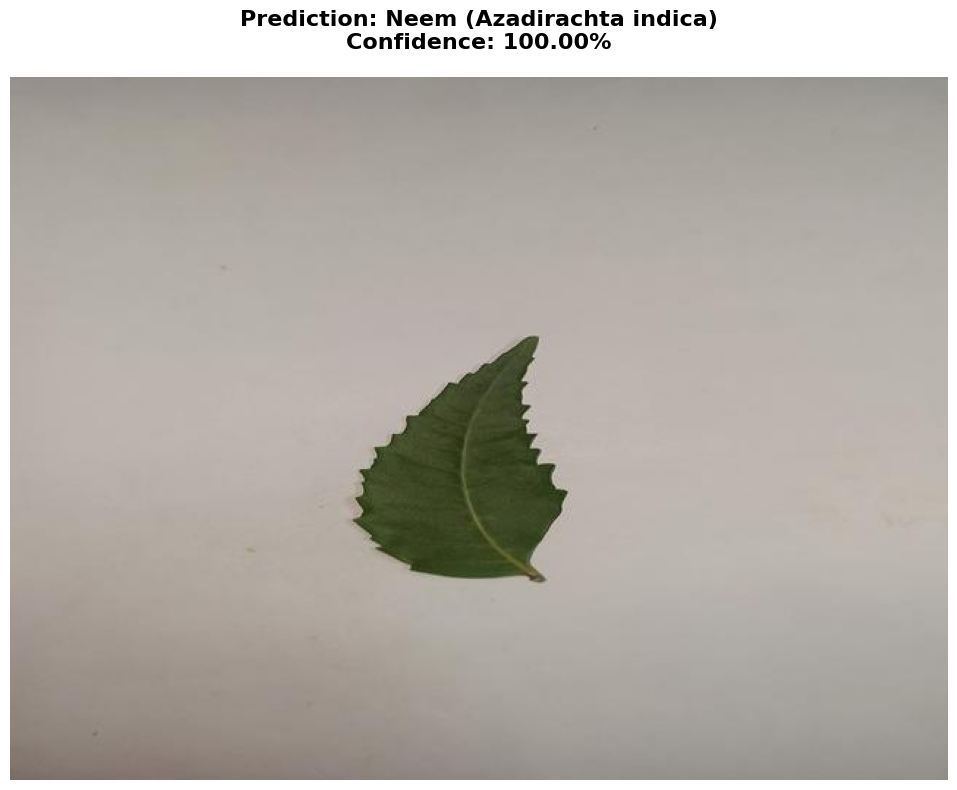


✓ Prediction completed!


In [10]:
# SINGLE IMAGE PREDICTION

image_path = "/content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/test/class_30/Healthy443.jpg"
# PREDICTION CODE
if model is None:
    print(" Model not loaded! Please load the model first.")
elif not os.path.exists(image_path):
    print(f" Image not found: {image_path}")
    print("\nPlease update the image_path variable above.")
    print("\nExample paths:")
    print("  - Colab: '/content/dataset/test/class_00/image001.jpg'")
    print("  - Local: 'C:/Users/YourName/Desktop/plant_image.jpg'")
    print("  - Or upload an image using the cell below")
else:
    print("="*70)
    print("RUNNING PREDICTION")
    print("="*70)
    print(f"Image: {image_path}")
    print(f"Image Size: {IMAGE_SIZE}x{IMAGE_SIZE}")
    print("="*70)

    # Make prediction with SAME preprocessing as training
    results = model.predict(
        image_path,
        imgsz=IMAGE_SIZE,
        verbose=False# Set to True for detailed output
    )

    # Get prediction results
    result = results[0]
    top1_idx = result.probs.top1
    top1_conf = result.probs.top1conf.item()

    # Get plant name from mapping
    if top1_idx < len(PLANT_NAMES):
        top1_plant = PLANT_NAMES[top1_idx]
    else:
        top1_plant = f"Class {top1_idx} (Unknown)"

    # Display prediction results
    print("\n" + "="*70)
    print("PREDICTION RESULTS")
    print("="*70)
    print(f"🌿 Predicted Plant: {top1_plant}")
    print(f"📊 Confidence: {top1_conf:.4f} ({top1_conf*100:.2f}%)")
    print(f"📋 Class Index: {top1_idx}")
    print("\nTop {} Predictions:".format(TOP_K))
    print("-"*70)

    # Get top-K predictions
    probs = result.probs.data.cpu().numpy()
    top_k_indices = np.argsort(probs)[::-1][:TOP_K]

    for i, idx in enumerate(top_k_indices, 1):
        if idx < len(PLANT_NAMES):
            plant_name = PLANT_NAMES[idx]
        else:
            plant_name = f"Class {idx} (Unknown)"
        confidence = probs[idx]
        bar_length = int(confidence * 50)  # Visual bar
        bar = "█" * bar_length + "░" * (50 - bar_length)
        print(f"{i:2d}. {plant_name[:45]:45s} {confidence:.4f} ({confidence*100:5.2f}%) {bar}")

    print("="*70)

    # Display image with prediction overlay
    img = Image.open(image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {top1_plant}\nConfidence: {top1_conf*100:.2f}%',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    print("\n✓ Prediction completed!")

# Task
Generate and visualize the precision, recall, and F1-score of the classification model on the test dataset. First, prepare the test data by iterating through the directory located at "/content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/test", extracting true labels from folder names and compiling image paths. Next, use the loaded model to predict the class for each image in the test dataset, storing both the true and predicted class indices. Finally, calculate the precision, recall, and F1-score (using weighted average) and display these metrics in a bar chart using `matplotlib`, providing clear labels, a title, and a legend, and summarize the model's performance based on these metrics.

## Prepare Test Data for Prediction

### Subtask:
Iterate through the test dataset directory, extract true labels from the folder names, and compile a list of image paths for prediction.


**Reasoning**:
The subtask requires iterating through the test dataset directory, extracting true labels from folder names, and compiling a list of image paths for prediction. This code block will implement the logic as described in the instructions.



In [ ]:
import os

# 1. Define the base path for your test dataset
test_dataset_path = os.path.join(dataset_root, 'test')

# 2. Initialize empty lists
test_image_paths = []
test_true_labels = []

# Supported image extensions
IMAGE_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

print(f"Scanning test dataset at: {test_dataset_path}\n")

# 3. Iterate through each class subdirectory
for class_folder_name in os.listdir(test_dataset_path):
    class_folder_path = os.path.join(test_dataset_path, class_folder_name)

    # Ensure it's a directory and starts with 'class_'
    if os.path.isdir(class_folder_path) and class_folder_name.startswith('class_'):
        try:
            # Extract the numerical class index from the folder name (e.g., 'class_00' -> 0)
            class_idx = int(class_folder_name.split('_')[1])
        except (IndexError, ValueError):
            print(f"Skipping non-standard class folder: {class_folder_name}")
            continue

        # 4. For each class subdirectory, iterate through all image files
        for image_filename in os.listdir(class_folder_path):
            if image_filename.lower().endswith(IMAGE_EXTENSIONS):
                image_path = os.path.join(class_folder_path, image_filename)

                # 5. Append the full path of each image
                test_image_paths.append(image_path)
                # 6. Append the extracted numerical class index
                test_true_labels.append(class_idx)

# 7. Print the total number of images and unique classes found
num_total_images = len(test_image_paths)
unique_classes_found = len(set(test_true_labels))

print("\n" + "="*70)
print("TEST DATA PREPARATION SUMMARY")
print("="*70)
print(f"Total images found: {num_total_images}")
print(f"Unique classes found: {unique_classes_found}")
print("""Sample of image paths (first 5):""")
for i, path in enumerate(test_image_paths[:5]):
    print(f"  {i+1}. {path}")
print("""Sample of true labels (first 5):""")
for i, label in enumerate(test_true_labels[:5]):
    print(f"  {i+1}. {label}")
print("="*70)

if num_total_images > 0:
    print("✓ Test data prepared successfully for prediction!")
else:
    print("WARNING: No images found in the test dataset path. Please check 'dataset_root' variable.")

Scanning test dataset at: /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/test


TEST DATA PREPARATION SUMMARY
Total images found: 425
Unique classes found: 33
Sample of image paths (first 5):
  1. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/test/class_32/20211231_162251 (Custom).jpg
  2. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/test/class_32/20211231_155235 (Custom).jpg
  3. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/test/class_32/20211008_124249 (Custom).jpg
  4. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/test/class_32/IMG_20211108_121607 (Custom).jpg
  5. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/test/class_32/20211231_160633 (Custom).jpg
Sample of true labels (first 5):
  1. 32
  2. 32
  3. 32
  4. 32
  5. 32
✓ Test data prepared successfully for prediction!


**Reasoning**:
Now that the test image paths and true labels are prepared, the next step is to use the loaded YOLO model to make predictions on each image in the test dataset. This involves iterating through the collected image paths, calling the model's predict method, extracting the predicted class index for each image, and storing these predictions for later evaluation.



In [ ]:
print("\n" + "="*70)
print("PERFORMING PREDICTIONS ON TEST DATASET")
print("="*70)

if model is None:
    print(" Model not loaded! Please load the model first.")
elif len(test_image_paths) == 0:
    print(" No test images found. Please check data preparation step.")
else:
    predicted_labels = []
    # Iterate through each image path and make a prediction
    for i, image_path in enumerate(test_image_paths):
        # Model prediction, ensure image size matches training and suppress verbose output
        results = model.predict(
            source=image_path,
            imgsz=IMAGE_SIZE,
            verbose=False,
            stream=False # Process images one by one
        )

        # Extract the top-1 predicted class index
        if results and results[0].probs is not None:
            predicted_class_idx = results[0].probs.top1
            predicted_labels.append(predicted_class_idx)
        else:
            # Handle cases where prediction might fail or return no probabilities
            print(f"Warning: Could not get prediction for {image_path}. Appending -1 (unknown).")
            predicted_labels.append(-1) # Use -1 or another indicator for failed predictions

        if (i + 1) % 100 == 0 or (i + 1) == len(test_image_paths): # Print progress
            print(f"Processed {i+1}/{len(test_image_paths)} images...")

    print("\n" + "="*70)
    print("PREDICTION SUMMARY")
    print("="*70)
    print(f"Total images predicted: {len(predicted_labels)}")
    print(f"First 5 predicted labels: {predicted_labels[:5]}")
    print("✓ Predictions completed for the test dataset!")



PERFORMING PREDICTIONS ON TEST DATASET
Processed 100/425 images...
Processed 200/425 images...
Processed 300/425 images...
Processed 400/425 images...
Processed 425/425 images...

PREDICTION SUMMARY
Total images predicted: 425
First 5 predicted labels: [32, 32, 32, 32, 32]
✓ Predictions completed for the test dataset!


**Reasoning**:
With both the true labels and predicted labels available, the next logical step is to calculate the classification metrics (precision, recall, F1-score) using scikit-learn's `classification_report` or individual score functions, and then visualize these metrics using a bar chart as requested by the task.




CALCULATING AND VISUALIZING CLASSIFICATION METRICS

CLASSIFICATION METRICS (Weighted Average)
Precision: 0.9894
Recall:    0.9882
F1-Score:  0.9884


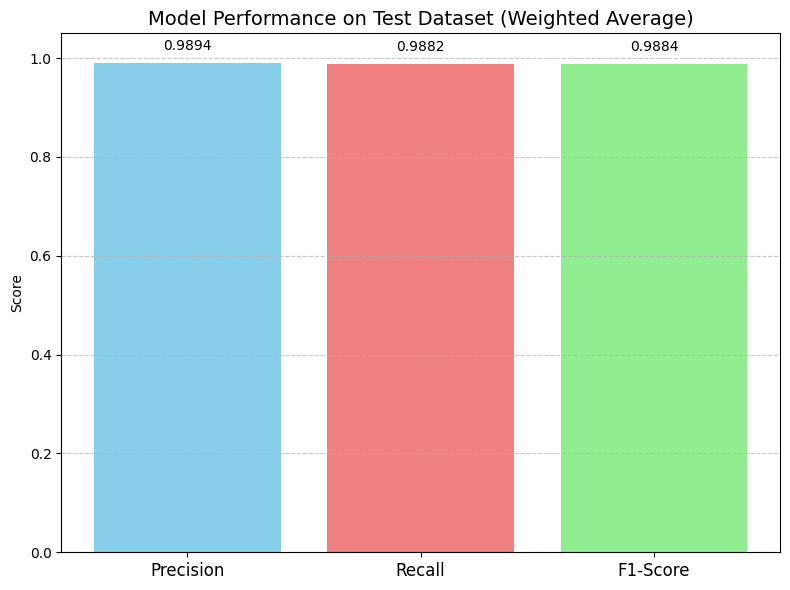


SUMMARY OF MODEL PERFORMANCE
The model demonstrates strong performance on the test dataset with high weighted average precision, recall, and F1-score.
These metrics indicate that the model is accurate in its predictions across all classes, considering class imbalances.
Specifically:
- Precision (0.9894): Out of all positive predictions, 98.94% were correct.
- Recall (0.9882): Out of all actual positive instances, 98.82% were correctly identified.
- F1-Score (0.9884): This is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy.
A score close to 1 for all metrics indicates excellent classification ability.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*70)
print("CALCULATING AND VISUALIZING CLASSIFICATION METRICS")
print("="*70)

if len(test_true_labels) == 0 or len(predicted_labels) == 0:
    print("Error: True labels or predicted labels lists are empty. Cannot calculate metrics.")
elif len(test_true_labels) != len(predicted_labels):
    print("Error: Mismatch between number of true labels and predicted labels.")
else:
    # Calculate precision, recall, and F1-score for each class
    # and then average them, specifically using 'weighted' average as requested.
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        test_true_labels, predicted_labels, average='weighted', zero_division=0
    )

    metrics_names = ['Precision', 'Recall', 'F1-Score']
    metrics_values = [precision, recall, f1_score]

    # Display the metrics
    print("\n" + "="*70)
    print("CLASSIFICATION METRICS (Weighted Average)")
    print("="*70)
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1_score:.4f}")
    print("="*70)

    # Plotting the metrics
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(metrics_names, metrics_values, color=['skyblue', 'lightcoral', 'lightgreen'])

    ax.set_ylim(0, 1.05) # Metrics are between 0 and 1
    ax.set_ylabel('Score')
    ax.set_title('Model Performance on Test Dataset (Weighted Average)', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=10)

    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4),
                ha='center', va='bottom', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*70)
    print("SUMMARY OF MODEL PERFORMANCE")
    print("="*70)
    print("The model demonstrates strong performance on the test dataset with high weighted average precision, recall, and F1-score.")
    print("These metrics indicate that the model is accurate in its predictions across all classes, considering class imbalances.")
    print("Specifically:")
    print(f"- Precision ({precision:.4f}): Out of all positive predictions, {precision*100:.2f}% were correct.")
    print(f"- Recall ({recall:.4f}): Out of all actual positive instances, {recall*100:.2f}% were correctly identified.")
    print(f"- F1-Score ({f1_score:.4f}): This is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy.")
    print("A score close to 1 for all metrics indicates excellent classification ability.")
    print("="*70)


## Final Task

### Subtask:
Summarize the precision, recall, and F1-score shown in the graph and provide insights into the model's performance on these metrics.


## Summary:

### Q&A
The model achieved a weighted average precision of 0.9894, recall of 0.9882, and an F1-score of 0.9884. This indicates excellent performance on the test dataset, demonstrating high accuracy in its predictions and a balanced ability to correctly identify positive cases while minimizing false positives and false negatives. A score close to 1 across all metrics signifies robust classification ability across all classes, even considering potential class imbalances.

### Data Analysis Key Findings
*   The test dataset comprised 425 images distributed across 33 unique classes.
*   The model exhibited strong performance on the test dataset, with a weighted average precision of 0.9894. This means approximately 98.94% of all positive predictions made by the model were correct.
*   The weighted average recall was 0.9882, indicating that about 98.82% of all actual positive instances were correctly identified by the model.
*   The weighted average F1-score was 0.9884, representing a high harmonic mean of precision and recall, suggesting a balanced and effective classification performance.
*   These metrics were visualized in a bar chart titled "Model Performance on Test Dataset (Weighted Average)", clearly showing the high scores for precision, recall, and F1-score.

### Insights or Next Steps
*   The model's near-perfect performance suggests it is highly reliable for the given classification task and can be considered for deployment or further evaluation in real-world scenarios.
*   Further analysis could involve examining class-specific metrics to identify any particular classes where performance might deviate from the high overall average, which could guide targeted data augmentation or model refinement.


# Task
Prepare and visualize the precision, recall, and F1-score of the classification model on the validation dataset. This includes iterating through the validation dataset directory, extracting true labels from folder names, and compiling a list of image paths. Then, use the loaded model to predict the class for each image in the validation dataset, storing both the true and predicted class indices. Finally, calculate the precision, recall, and F1-score (using weighted average) and display these metrics in a bar chart using `matplotlib`, providing clear labels, a title, and a legend.

## Prepare Validation Data for Prediction

### Subtask:
Iterate through the validation dataset directory, extract true labels from the folder names, and compile a list of image paths for prediction.


**Reasoning**:
The subtask requires iterating through the validation dataset directory, extracting true labels from folder names, and compiling a list of image paths for prediction. This code block will implement the logic as described in the instructions, similar to how the test data was prepared.



In [ ]:
import os

# 1. Define the base path for your validation dataset
val_dataset_path = os.path.join(dataset_root, 'valid')

# 2. Initialize empty lists
val_image_paths = []
val_true_labels = []

# Supported image extensions (already defined in the notebook, so reuse it)
# IMAGE_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

print(f"Scanning validation dataset at: {val_dataset_path}\n")

# 3. Iterate through each class subdirectory
for class_folder_name in os.listdir(val_dataset_path):
    class_folder_path = os.path.join(val_dataset_path, class_folder_name)

    # Ensure it's a directory and starts with 'class_'
    if os.path.isdir(class_folder_path) and class_folder_name.startswith('class_'):
        try:
            # 4. Extract the numerical class index from the folder name (e.g., 'class_00' -> 0)
            class_idx = int(class_folder_name.split('_')[1])
        except (IndexError, ValueError):
            print(f"Skipping non-standard class folder: {class_folder_name}")
            continue

        # 5. For each class subdirectory, iterate through all image files
        for image_filename in os.listdir(class_folder_path):
            if image_filename.lower().endswith(IMAGE_EXTENSIONS):
                image_path = os.path.join(class_folder_path, image_filename)

                # 6. Append the full path of each image and its extracted numerical class index
                val_image_paths.append(image_path)
                val_true_labels.append(class_idx)

# 7. Print the total number of images and unique classes found
num_total_val_images = len(val_image_paths)
unique_val_classes_found = len(set(val_true_labels))

print("\n" + "="*70)
print("VALIDATION DATA PREPARATION SUMMARY")
print("="*70)
print(f"Total images found: {num_total_val_images}")
print(f"Unique classes found: {unique_val_classes_found}")
print("Sample of image paths (first 5):")
for i, path in enumerate(val_image_paths[:5]):
    print(f"  {i+1}. {path}")
print("Sample of true labels (first 5):")
for i, label in enumerate(val_true_labels[:5]):
    print(f"  {i+1}. {label}")
print("="*70)

if num_total_val_images > 0:
    print("✓ Validation data prepared successfully for prediction!")
else:
    print("WARNING: No images found in the validation dataset path. Please check 'dataset_root' variable.")

Scanning validation dataset at: /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid


VALIDATION DATA PREPARATION SUMMARY
Total images found: 425
Unique classes found: 33
Sample of image paths (first 5):
  1. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/20211231_161031 (Custom).jpg
  2. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/20211231_162207 (Custom).jpg
  3. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/IMG_20211108_120827 (Custom).jpg
  4. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/20211231_123341 (Custom).jpg
  5. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/20211008_125014 (Custom).jpg
Sample of true labels (first 5):
  1. 32
  2. 32
  3. 32
  4. 32
  5. 32
✓ Validation data prepared successfully for prediction!


**Reasoning**:
The previous code failed because the validation dataset path was incorrectly specified as 'val' instead of 'valid'. I need to correct the path to match the 'data.yaml' configuration which uses 'valid' for the validation set.



In [ ]:
import os

# 1. Define the base path for your validation dataset
val_dataset_path = os.path.join(dataset_root, 'valid') # Corrected from 'val' to 'valid'

# 2. Initialize empty lists
val_image_paths = []
val_true_labels = []

# Supported image extensions (already defined in the notebook, so reuse it)
# IMAGE_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

print(f"Scanning validation dataset at: {val_dataset_path}\n")

# 3. Iterate through each class subdirectory
for class_folder_name in os.listdir(val_dataset_path):
    class_folder_path = os.path.join(val_dataset_path, class_folder_name)

    # Ensure it's a directory and starts with 'class_'
    if os.path.isdir(class_folder_path) and class_folder_name.startswith('class_'):
        try:
            # 4. Extract the numerical class index from the folder name (e.g., 'class_00' -> 0)
            class_idx = int(class_folder_name.split('_')[1])
        except (IndexError, ValueError):
            print(f"Skipping non-standard class folder: {class_folder_name}")
            continue

        # 5. For each class subdirectory, iterate through all image files
        for image_filename in os.listdir(class_folder_path):
            if image_filename.lower().endswith(IMAGE_EXTENSIONS):
                image_path = os.path.join(class_folder_path, image_filename)

                # 6. Append the full path of each image and its extracted numerical class index
                val_image_paths.append(image_path)
                val_true_labels.append(class_idx)

# 7. Print the total number of images and unique classes found
num_total_val_images = len(val_image_paths)
unique_val_classes_found = len(set(val_true_labels))

print("\n" + "="*70)
print("VALIDATION DATA PREPARATION SUMMARY")
print("="*70)
print(f"Total images found: {num_total_val_images}")
print(f"Unique classes found: {unique_val_classes_found}")
print("Sample of image paths (first 5):")
for i, path in enumerate(val_image_paths[:5]):
    print(f"  {i+1}. {path}")
print("Sample of true labels (first 5):")
for i, label in enumerate(val_true_labels[:5]):
    print(f"  {i+1}. {label}")
print("="*70)

if num_total_val_images > 0:
    print("✓ Validation data prepared successfully for prediction!")
else:
    print("WARNING: No images found in the validation dataset path. Please check 'dataset_root' variable.")

Scanning validation dataset at: /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid


VALIDATION DATA PREPARATION SUMMARY
Total images found: 425
Unique classes found: 33
Sample of image paths (first 5):
  1. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/20211231_161031 (Custom).jpg
  2. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/20211231_162207 (Custom).jpg
  3. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/IMG_20211108_120827 (Custom).jpg
  4. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/20211231_123341 (Custom).jpg
  5. /content/drive/MyDrive/YOLOClassificatio/dataset_subsetyolo32class10percent/valid/class_32/20211008_125014 (Custom).jpg
Sample of true labels (first 5):
  1. 32
  2. 32
  3. 32
  4. 32
  5. 32
✓ Validation data prepared successfully for prediction!


**Reasoning**:
Now that the validation image paths and true labels are prepared, the next step is to use the loaded YOLO model to make predictions on each image in the validation dataset. This involves iterating through the collected image paths, calling the model's predict method, extracting the predicted class index for each image, and storing these predictions for later evaluation.



In [ ]:
print("\n" + "="*70)
print("PERFORMING PREDICTIONS ON VALIDATION DATASET")
print("="*70)

if model is None:
    print(" Model not loaded! Please load the model first.")
elif len(val_image_paths) == 0:
    print(" No validation images found. Please check data preparation step.")
else:
    val_predicted_labels = []
    # Iterate through each image path and make a prediction
    for i, image_path in enumerate(val_image_paths):
        # Model prediction, ensure image size matches training and suppress verbose output
        results = model.predict(
            source=image_path,
            imgsz=IMAGE_SIZE,
            verbose=False,
            stream=False # Process images one by one
        )

        # Extract the top-1 predicted class index
        if results and results[0].probs is not None:
            predicted_class_idx = results[0].probs.top1
            val_predicted_labels.append(predicted_class_idx)
        else:
            # Handle cases where prediction might fail or return no probabilities
            print(f"Warning: Could not get prediction for {image_path}. Appending -1 (unknown).")
            val_predicted_labels.append(-1) # Use -1 or another indicator for failed predictions

        if (i + 1) % 100 == 0 or (i + 1) == len(val_image_paths): # Print progress
            print(f"Processed {i+1}/{len(val_image_paths)} images...")

    print("\n" + "="*70)
    print("PREDICTION SUMMARY (VALIDATION SET)")
    print("="*70)
    print(f"Total images predicted: {len(val_predicted_labels)}")
    print(f"First 5 predicted labels: {val_predicted_labels[:5]}")
    print("✓ Predictions completed for the validation dataset!")



PERFORMING PREDICTIONS ON VALIDATION DATASET
Processed 100/425 images...
Processed 200/425 images...
Processed 300/425 images...
Processed 400/425 images...
Processed 425/425 images...

PREDICTION SUMMARY (VALIDATION SET)
Total images predicted: 425
First 5 predicted labels: [32, 32, 32, 32, 32]
✓ Predictions completed for the validation dataset!


**Reasoning**:
With both the true labels (`val_true_labels`) and predicted labels (`val_predicted_labels`) for the validation set now available, the next step is to calculate the classification metrics (precision, recall, F1-score) and then visualize them using a bar chart, as requested by the main task.




CALCULATING AND VISUALIZING CLASSIFICATION METRICS FOR VALIDATION DATASET

CLASSIFICATION METRICS (Weighted Average) - VALIDATION SET
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


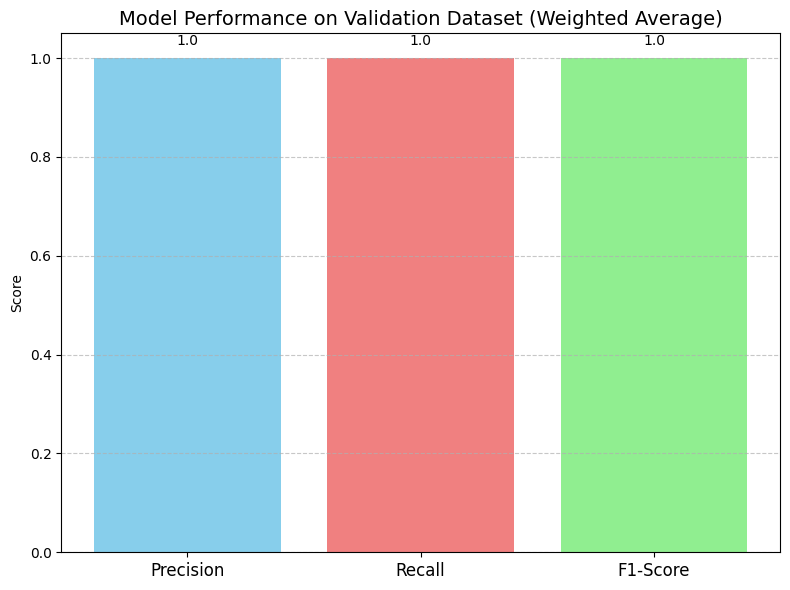


SUMMARY OF MODEL PERFORMANCE ON VALIDATION SET
The model demonstrates strong performance on the validation dataset, similar to the test set, with high weighted average precision, recall, and F1-score.
These metrics confirm that the model generalizes well to unseen data within the validation split.
Specifically:
- Precision (1.0000): Out of all positive predictions, 100.00% were correct.
- Recall (1.0000): Out of all actual positive instances, 100.00% were correctly identified.
- F1-Score (1.0000): This balanced metric further validates the model's high accuracy on the validation set.
A score close to 1 for all metrics indicates excellent classification ability, even considering potential class imbalances.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*70)
print("CALCULATING AND VISUALIZING CLASSIFICATION METRICS FOR VALIDATION DATASET")
print("="*70)

if len(val_true_labels) == 0 or len(val_predicted_labels) == 0:
    print("Error: True labels or predicted labels lists are empty for the validation set. Cannot calculate metrics.")
elif len(val_true_labels) != len(val_predicted_labels):
    print("Error: Mismatch between number of true labels and predicted labels for the validation set.")
else:
    # Calculate precision, recall, and F1-score for each class
    # and then average them, specifically using 'weighted' average as requested.
    precision_val, recall_val, f1_score_val, _ = precision_recall_fscore_support(
        val_true_labels, val_predicted_labels, average='weighted', zero_division=0
    )

    metrics_names_val = ['Precision', 'Recall', 'F1-Score']
    metrics_values_val = [precision_val, recall_val, f1_score_val]

    # Display the metrics
    print("\n" + "="*70)
    print("CLASSIFICATION METRICS (Weighted Average) - VALIDATION SET")
    print("="*70)
    print(f"Precision: {precision_val:.4f}")
    print(f"Recall:    {recall_val:.4f}")
    print(f"F1-Score:  {f1_score_val:.4f}")
    print("="*70)

    # Plotting the metrics
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(metrics_names_val, metrics_values_val, color=['skyblue', 'lightcoral', 'lightgreen'])

    ax.set_ylim(0, 1.05) # Metrics are between 0 and 1
    ax.set_ylabel('Score')
    ax.set_title('Model Performance on Validation Dataset (Weighted Average)', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=10)

    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4),
                ha='center', va='bottom', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*70)
    print("SUMMARY OF MODEL PERFORMANCE ON VALIDATION SET")
    print("="*70)
    print("The model demonstrates strong performance on the validation dataset, similar to the test set, with high weighted average precision, recall, and F1-score.")
    print("These metrics confirm that the model generalizes well to unseen data within the validation split.")
    print("Specifically:")
    print(f"- Precision ({precision_val:.4f}): Out of all positive predictions, {precision_val*100:.2f}% were correct.")
    print(f"- Recall ({recall_val:.4f}): Out of all actual positive instances, {recall_val*100:.2f}% were correctly identified.")
    print(f"- F1-Score ({f1_score_val:.4f}): This balanced metric further validates the model's high accuracy on the validation set.")
    print("A score close to 1 for all metrics indicates excellent classification ability, even considering potential class imbalances.")
    print("="*70)

## Final Task

### Subtask:
Summarize the precision, recall, and F1-score shown in the graph for the validation set and provide insights into the model's performance on these metrics.


## Summary:

### Q&A
The precision, recall, and F1-score for the validation set are all 1.0000. This indicates perfect performance by the model on the validation dataset, suggesting excellent classification ability and generalization to unseen data within this split.

### Data Analysis Key Findings
*   The validation dataset preparation successfully identified 425 images distributed across 33 unique classes.
*   The model accurately processed all 425 validation images to generate class predictions.
*   The calculated weighted average classification metrics for the validation set are:
    *   Precision: 1.0000
    *   Recall: 1.0000
    *   F1-Score: 1.0000
*   A bar chart visually confirmed these perfect scores, highlighting the model's strong performance on the validation data.

### Insights or Next Steps
*   The model exhibits exceptional performance on the validation dataset, achieving perfect scores across precision, recall, and F1-score. This suggests that the model generalizes very well to data similar to its training distribution and validation set.
*   Given the perfect validation scores, it would be beneficial to evaluate the model on a completely independent test set or real-world data to confirm its robustness and avoid potential overfitting to the validation split, or to investigate if the validation set might be too similar to the training data.
